**Importing necessary modules**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Loading the Dataset**

In [154]:
data = pd.read_csv('/content/Titanic-Dataset.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [155]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [157]:
no_of_rows, no_of_cols = data.shape
print("Number of rows : ",no_of_rows)
print("Number of cols: ",no_of_cols)

Number of rows :  891
Number of cols:  12


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling Missing Values**

In [160]:
data = data.drop(columns='Cabin',axis=1)

In [161]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [163]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [164]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [165]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [166]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Analysis**


In [167]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Data Visualisation**

<ipython-input-169-c318a90fd37b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data,palette='viridis')


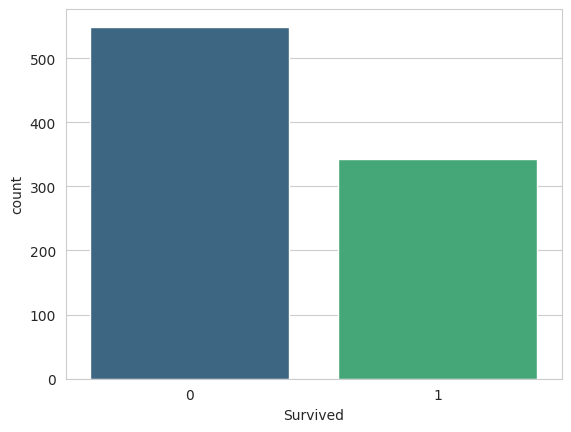

Survived
0    549
1    342
Name: count, dtype: int64

In [169]:
sns.countplot(x='Survived', data=data,palette='viridis')
plt.show()
data['Survived'].value_counts()


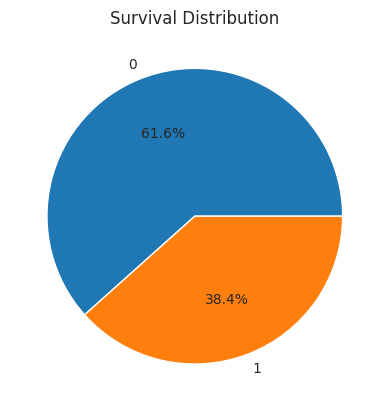

In [170]:
survived_counts = data['Survived'].value_counts()
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()


<ipython-input-171-01b5ed09beae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='viridis')


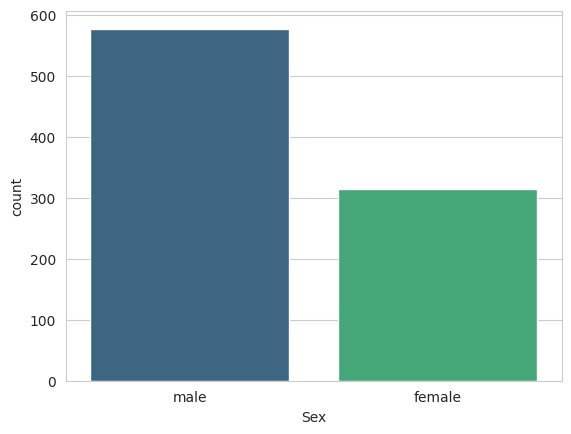

Sex
male      577
female    314
Name: count, dtype: int64

In [171]:
sns.countplot(x='Sex', data=data, palette='viridis')
plt.show()
data['Sex'].value_counts()


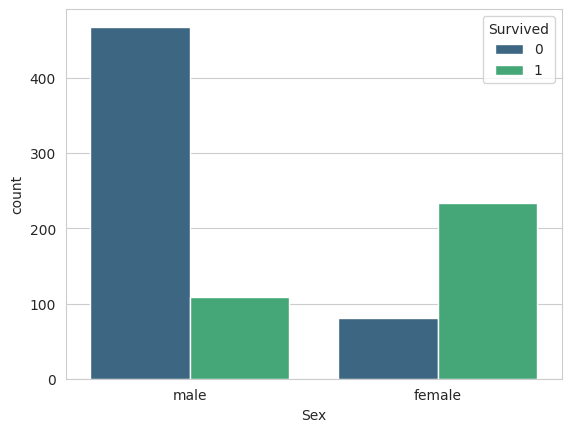

In [172]:
sns.countplot(x='Sex',hue='Survived', data=data, palette='viridis')
plt.show()


<ipython-input-173-229834285a76>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='viridis')


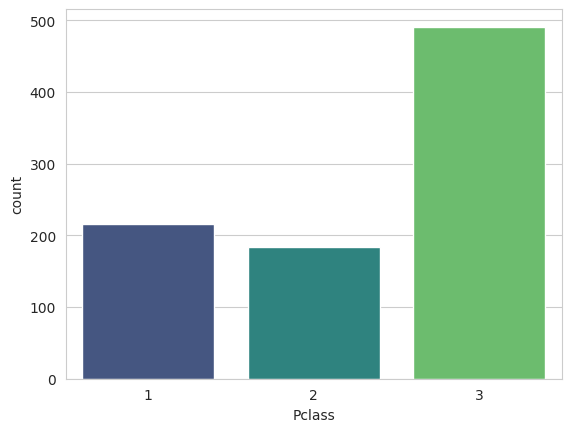

In [173]:
sns.countplot(x='Pclass', data=data, palette='viridis')
plt.show()


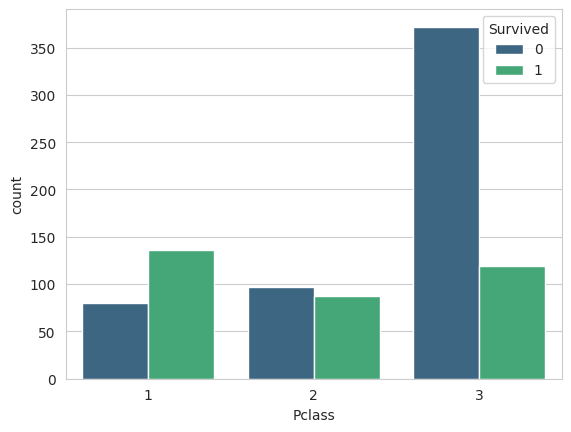

In [174]:
sns.countplot(x='Pclass',hue='Survived', data=data, palette='viridis')
plt.show()


**Encoding Categorical Columns**

In [175]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [176]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [177]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [178]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Standardizing necessary columns**

In [179]:
from sklearn.preprocessing import StandardScaler

min_max_scaler = StandardScaler()
data[['Age','Fare']] = min_max_scaler.fit_transform(data[['Age','Fare']])
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.502445,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.786845,1
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.488854,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.420730,0
4,5,0,3,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.486337,0


**Splitting Target Columns**

In [180]:
X = data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)
Y = data['Survived']

In [181]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0 -0.592481      1      0 -0.502445         0
1         1    1  0.638789      1      0  0.786845         1
2         3    1 -0.284663      0      0 -0.488854         0
3         1    1  0.407926      1      0  0.420730         0
4         3    0  0.407926      0      0 -0.486337         0
..      ...  ...       ...    ...    ...       ...       ...
886       2    0 -0.207709      0      0 -0.386671         0
887       1    1 -0.823344      0      0 -0.044381         0
888       3    1  0.000000      1      2 -0.176263         0
889       1    0 -0.284663      0      0 -0.044381         1
890       3    0  0.177063      0      0 -0.492378         2

[891 rows x 7 columns]


In [182]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Train Test Split**

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Model Training**

In [184]:
model = LogisticRegression()


In [185]:
model.fit(X_train, Y_train)

LogisticRegression()

**Model Evaluation**

In [186]:
Y_pred_test = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Accuracy Score : ",accuracy)

Accuracy Score :  0.7988826815642458


**Visualising Results**

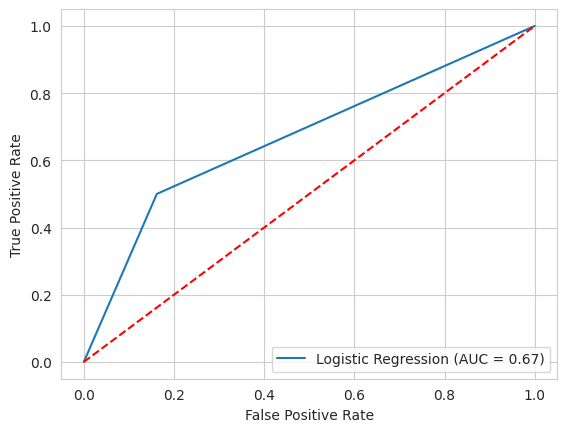

In [187]:
from sklearn.metrics import accuracy_score, roc_curve, auc, RocCurveDisplay
fpr, tpr, _ = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.show()

In [188]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

cr = classification_report(Y_test, Y_pred)
print("Classification Report: \n\n",cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.70      0.84      0.77       105
           1       0.69      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



Confusion Matrix : 



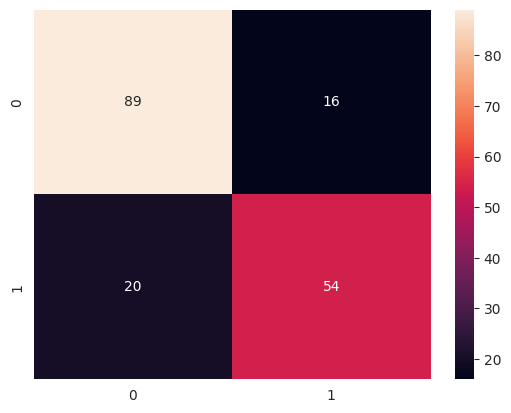

In [189]:
print("Confusion Matrix : \n")
sns.heatmap(cm,annot=True)
plt.show()